In [1]:
import sklearn
import pandas as pd
from sklearn.preprocessing import(StandardScaler, LabelEncoder)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#-- Importing the dataset --#
df_raw = pd.read_csv("/Users/lindasegalini/Desktop/WGU/New Program/D212 Advanced Data Mining/churn_clean.csv")
df_raw.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

# Determine the number of features in the data set

In [3]:
df_raw.shape

(10000, 50)

In [4]:
#-- Creating a new dataframe with the continous variables --#

df = df_raw[['Lat','Lng','Population','Children','Age','Income','Outage_sec_perweek', 'Email', 'Contacts', 
             'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
df

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,43.43391,-72.78734,640,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601
9996,36.56907,-87.41694,77168,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810
9997,35.52039,-100.44180,406,1,48,45983.43,6.590911,10,0,0,47.416890,169.974100,4159.305799
9998,33.58016,-85.13241,35575,1,39,16667.58,12.071910,14,1,0,71.095600,252.624000,6468.456752


# Standardize data if needed. Scale data to same scale to avoid dominance


In [5]:
#-- Import the class --#
from sklearn.preprocessing import(StandardScaler, LabelEncoder)

#-- Create the object --#

scaler = StandardScaler()

#-- Calculate the mean and Standard deviation --#
scaler.fit(df)

df_scaled = scaler.transform(df)



In [10]:
#-- Saving copy of the cleaned dataset --#
pd.DataFrame(df_scaled).to_csv('/Users/lindasegalini/Desktop/WGU/New Program/D212 Advanced Data Mining/PCA/Submission.csv')

# Apply PCA to all features to explain 100% variance

In [11]:
import sklearn
from sklearn.decomposition import PCA

pca_13 = PCA(n_components = 13, random_state = 2022)
pca_13.fit(df_scaled)
pc = pca_13.transform(df_scaled)
print(pc)

[[-1.63263488 -3.29635409  0.57818418 ...  0.01470108  0.70379222
  -0.02556163]
 [-1.67888952 -0.66379299 -0.16526261 ... -1.46285917  0.92739224
  -0.03690825]
 [-0.94798506 -1.6621073   1.50054206 ...  0.72990114 -0.25927031
   0.0603088 ]
 ...
 [ 0.58345317 -0.27778175  0.76059769 ... -0.28768661 -1.01593756
  -0.08826337]
 [ 2.03631986  2.00793622 -0.95591075 ... -0.63146318  0.64022982
  -0.06961958]
 [ 1.57452062  0.96794063 -0.79444654 ... -1.26424798 -0.15401524
  -0.03415051]]


Create a dataframe to explain all 13 features in the dataset

In [12]:
pc_df = pd.DataFrame(pc, columns = ['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                    'PC11', ' PC12', 'PC13'])
print(pc_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.632635 -3.296354  0.578184  2.947064  0.049200  0.236283 -1.239584   
1    -1.678890 -0.663793 -0.165263 -0.587533 -0.864341  1.227328 -1.145874   
2    -0.947985 -1.662107  1.500542  1.260078 -0.604303  1.120935 -1.470020   
3    -0.928918  0.883883 -0.255494  1.343020 -1.897874  0.114564  0.424392   
4    -1.889784  1.581549 -0.992000  0.972279  1.138263 -0.503190 -0.011660   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.883026 -0.917225  0.119696 -1.368667 -0.215508 -0.483779  1.335592   
9996  1.468912  3.517718  0.444508  0.815071 -1.000443 -0.606728  0.790954   
9997  0.583453 -0.277782  0.760598  0.478853  0.423992 -0.918188 -0.197058   
9998  2.036320  2.007936 -0.955911 -0.130067 -1.730513  0.281978 -0.288711   
9999  1.574521  0.967941 -0.794447 -0.841324 -1.957076 -0.529423 -0.461146   

           PC8       PC9      PC10      PC11      PC12      PC1

In [13]:
Load = pd.DataFrame(pca_13.components_.T,
                    columns = ['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                    'PC11', ' PC12', 'PC13'],
                      index = df.columns)
Load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Lat,-0.023161,-0.714010,-0.031715,0.109414,-0.094872,-0.030887,-0.010719,-0.020375,0.090273,0.018619,0.053958,0.674376,0.001077
Lng,0.007911,0.180879,-0.285753,-0.736871,0.344620,-0.087695,-0.052349,-0.086499,-0.172285,-0.151301,-0.112280,0.375138,0.000788
Population,-0.001230,0.653439,0.151916,0.322012,-0.119517,0.098791,0.053682,0.079161,-0.027392,0.055304,0.100818,0.631729,-0.000070
Children,0.014244,-0.014267,0.447882,-0.464670,-0.107498,0.130597,0.034812,-0.065531,0.192459,0.437471,0.565626,-0.011794,-0.021597
Age,0.001860,0.052795,-0.443537,0.227235,0.436759,-0.096321,-0.188399,0.093484,0.342892,-0.083596,0.614892,-0.037729,0.022360
Income,0.004185,-0.054602,0.195742,-0.041772,0.312779,0.100371,0.773549,0.335467,0.246663,-0.275852,-0.033742,0.006645,-0.000941
Outage_sec_perweek,0.005811,0.009174,-0.249550,-0.126214,-0.455981,0.597523,0.051915,-0.184658,0.057056,-0.515406,0.223304,-0.034155,0.000271
Email,-0.020020,0.152355,-0.092711,-0.144998,-0.353186,-0.403463,0.003835,-0.125375,0.760622,-0.052146,-0.247985,0.027357,0.000274
Contacts,0.004283,0.031043,-0.447906,0.108875,0.011245,0.082442,0.519791,-0.510974,-0.052695,0.494601,-0.028194,-0.011878,-0.000947
Yearly_equip_failure,0.017665,-0.007070,0.153686,0.063449,0.420468,0.592380,-0.290766,-0.194665,0.397088,0.143419,-0.376943,0.038880,-0.000083


In [14]:
print("Variance explained by all the Principal components = ", sum(pca_13.explained_variance_ratio_ * 100))

Variance explained by all the Principal components =  100.0


In [15]:
pca_13.explained_variance_ratio_ * 100

array([15.34388817,  9.49252346,  8.10511076,  8.03530799,  7.87065959,
        7.77446725,  7.68617423,  7.63519934,  7.57255848,  7.39838628,
        7.38768662,  5.65599547,  0.04204237])

# Captured Variance per Principal Components for all 13 PCs

Well diversified variance akin to an index fund. 

In [16]:
varex = pca_13.explained_variance_ratio_ * 100

var_df = pd.DataFrame(varex.round(2), columns = ['Captured Variance per PC'],
                      index = ['PC1', 'PC2', 'PC3','PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                    'PC11', ' PC12', 'PC13'])
var_df

,Captured Variance per PC
PC1,15.34
PC2,9.49
PC3,8.11
PC4,8.04
PC5,7.87
PC6,7.77
PC7,7.69
PC8,7.64
PC9,7.57
PC10,7.40


# Scree Plot

The diagonal line representing the number of Principal Components on the 'X'axis and Explained Variance on 'Y'.

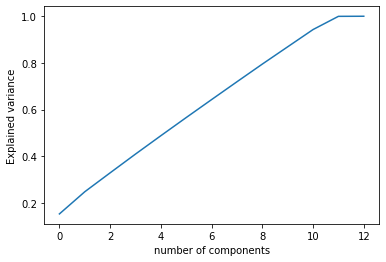

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca_13.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.savefig("elbow_plot.png", dpi =100)

The above plot explained the 13 PCs storing 100% of the variability


In [18]:
print("The variance explained the first principal component is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[0])
print("The variance explained the first 2 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[1])
print("The variance explained the first 3 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[2])
print("The variance explained the first 4 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[3])
print("The variance explained the first 5 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[4])
print("The variance explained the first 6 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[5])
print("The variance explained the first 7 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[6])
print("The variance explained the first 8 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[7])
print("The variance explained the first 9 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[8])
print("The variance explained the first 10 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[9])
print("The variance explained the first 11 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[10])
print("The variance explained the first 12 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[11])
print("The variance explained the first 13 principal components is =",
np.cumsum(pca_13.explained_variance_ratio_ * 100)[12])

The variance explained the first principal component is = 15.343888168137667
The variance explained the first 2 principal components is = 24.836411624673865
The variance explained the first 3 principal components is = 32.94152238573924
The variance explained the first 4 principal components is = 40.97683038064265
The variance explained the first 5 principal components is = 48.8474899748374
The variance explained the first 6 principal components is = 56.621957221855276
The variance explained the first 7 principal components is = 64.30813144830992
The variance explained the first 8 principal components is = 71.94333078979099
The variance explained the first 9 principal components is = 79.51588926967034
The variance explained the first 10 principal components is = 86.91427554881587
The variance explained the first 11 principal components is = 94.30196216402624
The variance explained the first 12 principal components is = 99.95795763298327
The variance explained the first 13 principal comp

A heat map representing the variance per PC

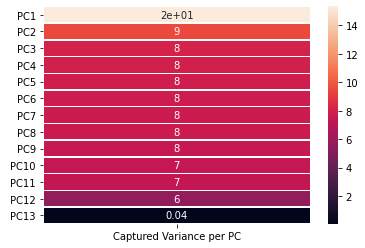

In [19]:
import seaborn as sns
sns.heatmap(var_df, annot = True, linewidth = 0.5, fmt ='.1g')
plt.show()